In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score,balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
df=pd.read_csv('/content/drive/MyDrive/smdm_data.csv')
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,...,126,2,0,120,137,121,73,1,9,2
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,...,198,6,1,141,136,140,12,0,6,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,...,198,5,1,141,135,138,13,0,6,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,...,170,11,0,137,134,137,13,1,6,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,...,170,9,0,137,136,138,11,1,2,1


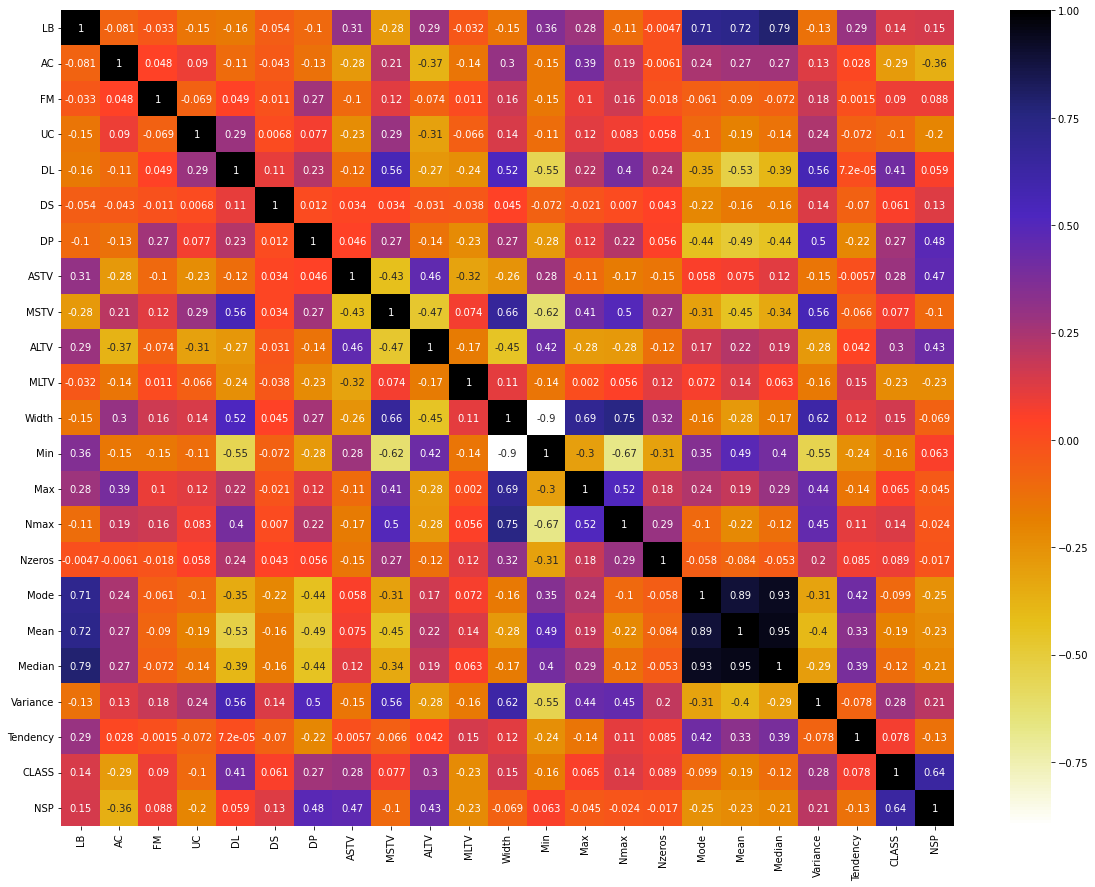

In [3]:
cor = df.corr()                   
plt.figure(figsize=(20,15))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()  

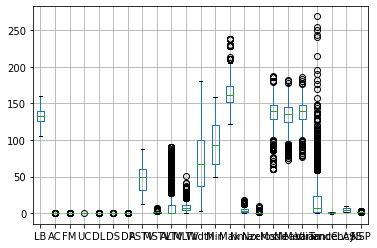

In [4]:
df.boxplot()
plt.show()

In [5]:
df.std()

LB           9.840844
AC           0.003866
FM           0.046666
UC           0.002946
DL           0.002960
DS           0.000057
DP           0.000590
ASTV        17.192814
MSTV         0.883241
ALTV        18.396880
MLTV         5.628247
Width       38.955693
Min         29.560212
Max         17.944183
Nmax         2.949386
Nzeros       0.706059
Mode        16.381289
Mean        15.593596
Median      14.466589
Variance    28.977636
Tendency     0.610829
CLASS        3.026883
NSP          0.614377
dtype: float64

In [6]:
X=df.iloc[:,:21]  
Y=df.iloc[:,22]
pca=PCA()    #Καθώς έχουμε μη επιβλεπόμενη συσταδοποίηση δε μπορούμε να ξέρουμε ποιές μεταβλητές είναι πιο σημαντικές όπως στην κατηγοροιοποίηση όπου είχαμε σαν κριτήριο την συσχέτιση.Επομένως κύριο κριτήριο είναι μεταβλητές με μεγάλη διασπορά.
scaler=StandardScaler() #Οπότε μπορούμε είτε να επιλέξουμε μεταβλητές με μεγάλη διασπορά αλλά να είναι μεν μεταξύ τους ασυσχέτιστες ή να κάνουμe PCA και να πάρουμε τις πρώτες συνιστώσες όπου θα έχουνε μεγαλύτερη διασπορά από τις τελευταίες.
X=scaler.fit_transform(X) 
X=pca.fit_transform(X)
np.round(pca.explained_variance_ratio_,4)

array([0.2885, 0.167 , 0.0869, 0.0713, 0.058 , 0.0486, 0.0468, 0.0441,
       0.0363, 0.0305, 0.0275, 0.0237, 0.0185, 0.0156, 0.0126, 0.0086,
       0.0063, 0.0056, 0.0024, 0.0013, 0.    ])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5c873909a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5c873a30a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5c87390640>,
 'medians': [<matplotlib.lines.Line2D at 0x7f5c873a3760>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5c873a3a60>,
 'means': []}

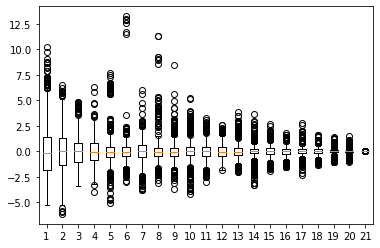

In [7]:
X=np.array(X)     #Βλέπουμε πως οι πρώτες 2 μεταβλητές διατηρούν το 28%+15%=45% της αρχικής μεταβλητότητας και με αυτέ θα κάνουμε τα δισδιάστα plots ενώ με τις πρώτες τρεις (περίπου 53% μεταβλητότητας) τα τρισδιάστατα plots.
plt.boxplot(X)

Plot of  0 and 0


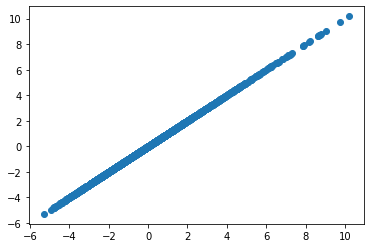

Plot of  0 and 1


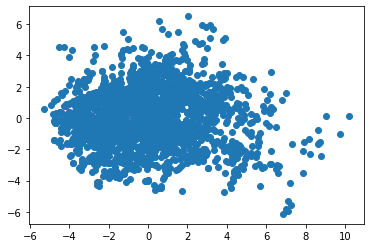

Plot of  0 and 2


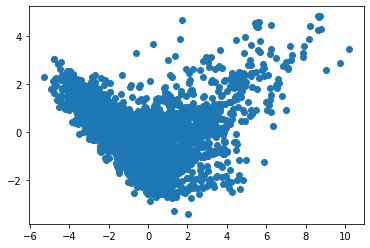

Plot of  1 and 0


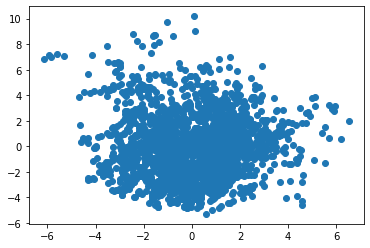

Plot of  1 and 1


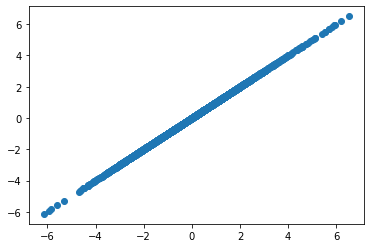

Plot of  1 and 2


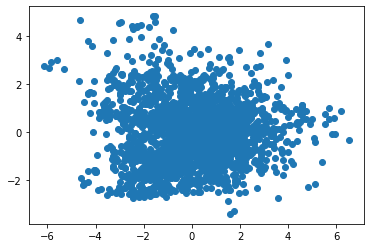

Plot of  2 and 0


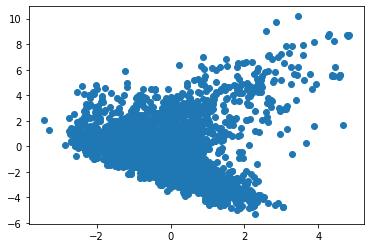

Plot of  2 and 1


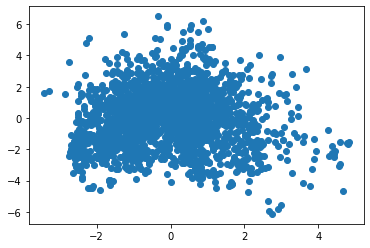

Plot of  2 and 2


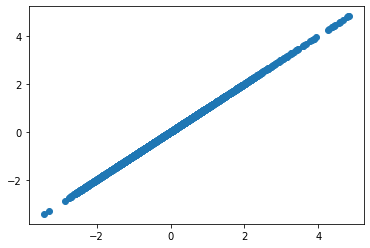

In [8]:
for i in range(0,3):
  for j in range(0,3):
    print('Plot of ',i,'and',j)
    plt.scatter(X[:,i], X[:,j])
    plt.show()

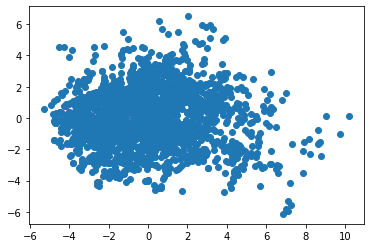

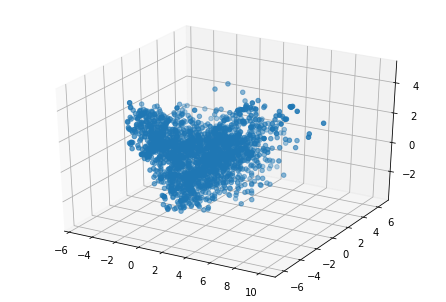

In [9]:
plt.scatter(X[:,0], X[:,1])    #Βλέπουμε πως το pattern είναι αρκετά πυκνό επομένως density based algorithms δε θα είναι αποδοτικοί.Θα κάνουμε συστατοδοποίηση με έναν distance based algorithm(K-means) και έναν βασισμένο σε πιθανοφάνειες(Gaussian Mixture Model)
plt.show()                
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter( X[:,0], X[:,1],X[:,2])
fig.show()

# K-means -Δεν θα κάνουμε scaling πριν το k-means αφού έχουμε κάνει  PCA και η  απόστασταση στην πρώτη συνιστώσα είναι σημαντικότερη από την 2η κ.ο.κ. Διαφορετικά βγαίνουν πολύ κακά αποτελέσματα

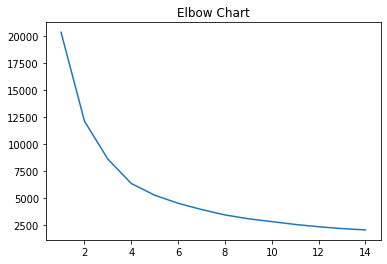

In [10]:
# Elbow-Chart     
wcss=[]
for i in range(1,15):
  km=KMeans(n_clusters=i)
  km.fit(X[:,[0,1]])
  wcss.append(km.inertia_)

plt.plot(range(1,15),wcss)
plt.title("Elbow Chart")
plt.show()     #το elbow chart προτείνει 4 clusters ωστόσο θα επιλέξουμε κάτι κοντινό στις κατηγορηματικές που έχουμε οπότε θα επιδιώξουμε 3 συστάδες

Silhouetter Score: 0.163


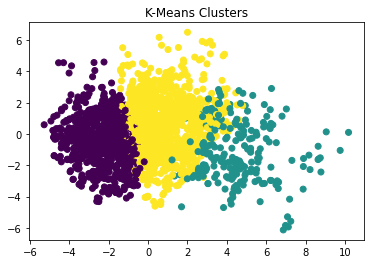

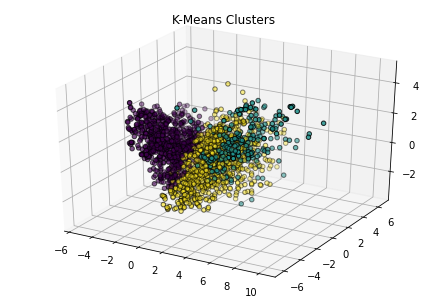

In [11]:
# Kmeans cluster  χαμηλό silhouete score ωστόσο δεδομένου του συνωστισμού μεταξύ των σημείων στα αρχικά πλοτς ήταν αναμενόμενο καθώς το silhouete score λαμβάνει υπόψιν και την απόσταση των σημείων από το γειτονικά clusters και βλέπουμε πως είναι αρκετα συνωστισμένα.Ας δούμε πως πήγε με το confusion matrix
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)

kmeans=cluster.fit(X)

score=silhouette_score(X,kmeans.labels_,metric='euclidean')
print('Silhouetter Score: %.3f'%score)

plt.scatter(X[:, 0], X[:, 1],c=kmeans.labels_)
plt.title("K-Means Clusters")
fig = plt.figure() 
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=kmeans.labels_, edgecolor='k')
plt.title("K-Means Clusters")
fig.show()

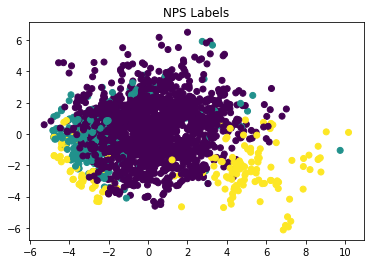

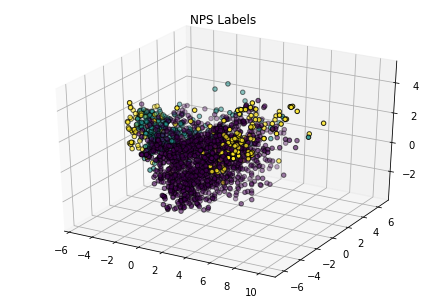

In [12]:
plt.scatter(X[:,0], X[:,1],c=Y)    #Για να δούμε τα πλοτς με labels την πραγματική τιμή στόχου της NSP
plt.title("NPS Labels")
plt.show()                #Βλέπουμε στο δισδιάστατο πλοτ πως η μία κλάση είναι κυρίως αριστερά η άλλη εκτείνεται στο μεγαλύτερο μέρος του κέντρου ενώ η τρίτη απλώνεται κυρίως δεξιά ενώ έχει αρκετά σημεία αριστερά,δηλαδή ο άξονας χ που αποτελείται από την πρώτη συνιστώσα('0') φαίνεται να παίζει το μεγαλύτερο ρόλο στην συσταδοποίηση
fig = plt.figure()        
ax = Axes3D(fig)
ax.scatter( X[:,0], X[:,1],X[:,2],c=Y, edgecolor='k')
plt.title("NPS Labels")
fig.show()

In [13]:
np.unique(Y, return_counts=True)

(array([1, 2, 3]), array([1655,  295,  176]))

In [14]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)
kmeans=cluster.fit(X)
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([ 821,  229, 1076]))

Prediction accuracy for the testing dataset is:  65.4 %
Prediction balanced accuracy for the testing dataset is:  69.2 %
--------------- Confusion Matrix ---------------
[[1037  513  105]
 [  35  245   15]
 [   4   63  109]]


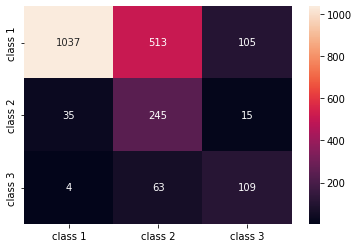

In [15]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)  #Με όλες τισ συνιστώσες πετύχαμε γενική ακρίβεια 65,4% και ισορροπημένη ακρίβεια 69.2%.Θα δούμε τώρα αν μπορούμε να θυσιάσουμε λίγη ακρίβεια ώστε να μειώσουμε το πλήθος των features για λιγότερους υπολογισμούς(με κέρδος ταχύτητα)
kmeans=cluster.fit(X)

kmeans.labels_[np.where(kmeans.labels_==2)]=4  #1
kmeans.labels_[np.where(kmeans.labels_==0)]=5  #2
kmeans.labels_[np.where(kmeans.labels_==1)]=6  #3

kmeans.labels_[np.where(kmeans.labels_==4)]=1
kmeans.labels_[np.where(kmeans.labels_==5)]=2
kmeans.labels_[np.where(kmeans.labels_==6)]=3
labels=kmeans.labels_
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(Y,labels)*100, 1), "%")

print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(Y,labels)*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(Y,labels))
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(Y, labels), columns=classes_names, index = classes_names)
sns.heatmap(cm, annot=True, fmt='d');

In [16]:
Z=X[:,0:16]


Silhouetter Score: 0.163


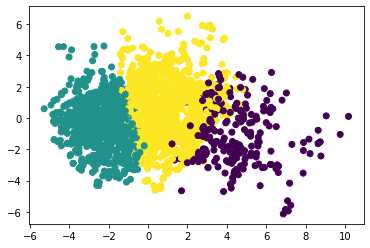

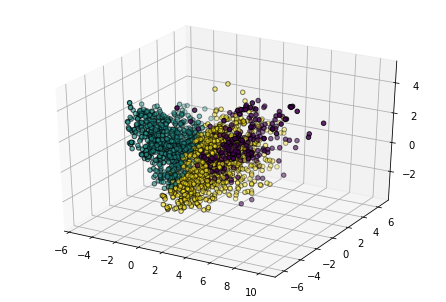

In [17]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)

kmeans=cluster.fit(Z)

score=silhouette_score(X,kmeans.labels_,metric='euclidean')
print('Silhouetter Score: %.3f'%score)

plt.scatter(Z[:, 0], Z[:, 1],c=kmeans.labels_)
fig = plt.figure() 
ax = Axes3D(fig)
ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], c=kmeans.labels_, edgecolor='k')
fig.show()

In [18]:
np.unique(Y, return_counts=True)

(array([1, 2, 3]), array([1655,  295,  176]))

In [19]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)
kmeans=cluster.fit(Z)
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([ 229,  821, 1076]))

In [20]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)    #Ίδια ακρίβεια με λιγότερες συνιστώσες
kmeans=cluster.fit(Z)

kmeans.labels_[np.where(kmeans.labels_==2)]=4  #1
kmeans.labels_[np.where(kmeans.labels_==1)]=5  #2
kmeans.labels_[np.where(kmeans.labels_==0)]=6  #3

kmeans.labels_[np.where(kmeans.labels_==4)]=1
kmeans.labels_[np.where(kmeans.labels_==5)]=2
kmeans.labels_[np.where(kmeans.labels_==6)]=3
labels=kmeans.labels_
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(Y,labels)*100, 1), "%")

print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(Y,labels)*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(Y,labels))

Prediction accuracy for the testing dataset is:  65.4 %
Prediction balanced accuracy for the testing dataset is:  69.2 %
--------------- Confusion Matrix ---------------
[[1037  513  105]
 [  35  245   15]
 [   4   63  109]]


In [21]:
Z=X[:,0:10]

Silhouetter Score: 0.164


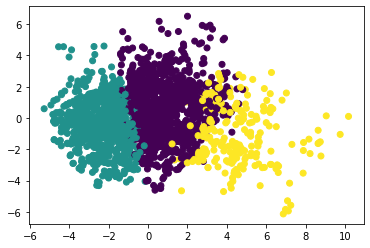

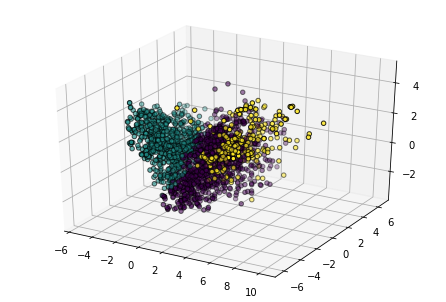

In [22]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)

kmeans=cluster.fit(Z)

score=silhouette_score(X,kmeans.labels_,metric='euclidean')
print('Silhouetter Score: %.3f'%score)

plt.scatter(Z[:, 0], Z[:, 1],c=kmeans.labels_)
fig = plt.figure() 
ax = Axes3D(fig)
ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], c=kmeans.labels_, edgecolor='k')
fig.show()

In [23]:
np.unique(Y, return_counts=True)

(array([1, 2, 3]), array([1655,  295,  176]))

In [24]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)
kmeans=cluster.fit(Z)
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([1077,  823,  226]))

In [25]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)    #Ίδια ακρίβεια με λιγότερες συνιστώσες
kmeans=cluster.fit(Z)

kmeans.labels_[np.where(kmeans.labels_==0)]=4  #1
kmeans.labels_[np.where(kmeans.labels_==1)]=5  #2
kmeans.labels_[np.where(kmeans.labels_==2)]=6  #3

kmeans.labels_[np.where(kmeans.labels_==4)]=1
kmeans.labels_[np.where(kmeans.labels_==5)]=2
kmeans.labels_[np.where(kmeans.labels_==6)]=3
labels=kmeans.labels_
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(Y,labels)*100, 1), "%")

print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(Y,labels)*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(Y,labels))

Prediction accuracy for the testing dataset is:  65.5 %
Prediction balanced accuracy for the testing dataset is:  69.2 %
--------------- Confusion Matrix ---------------
[[1038  515  102]
 [  35  245   15]
 [   4   63  109]]


In [26]:
Z=X[:,0:8]

Silhouetter Score: 0.163


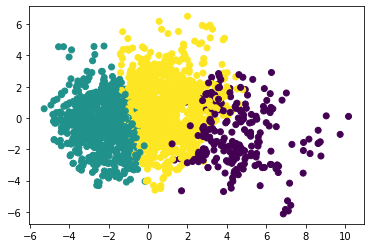

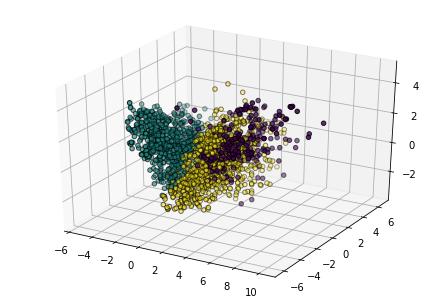

In [27]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)

kmeans=cluster.fit(Z)

score=silhouette_score(X,kmeans.labels_,metric='euclidean')
print('Silhouetter Score: %.3f'%score)

plt.scatter(Z[:, 0], Z[:, 1],c=kmeans.labels_)
fig = plt.figure() 
ax = Axes3D(fig)
ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], c=kmeans.labels_, edgecolor='k')
fig.show()

In [28]:
np.unique(Y, return_counts=True)

(array([1, 2, 3]), array([1655,  295,  176]))

In [29]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)
kmeans=cluster.fit(Z)
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([ 231,  822, 1073]))

In [30]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)    #Ίδια ακρίβεια με λιγότερες συνιστώσες
kmeans=cluster.fit(Z)

kmeans.labels_[np.where(kmeans.labels_==2)]=4  #1
kmeans.labels_[np.where(kmeans.labels_==1)]=5  #2  
kmeans.labels_[np.where(kmeans.labels_==0)]=6  #3

kmeans.labels_[np.where(kmeans.labels_==4)]=1
kmeans.labels_[np.where(kmeans.labels_==5)]=2
kmeans.labels_[np.where(kmeans.labels_==6)]=3
labels=kmeans.labels_
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(Y,labels)*100, 1), "%")

print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(Y,labels)*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(Y,labels))

Prediction accuracy for the testing dataset is:  65.3 %
Prediction balanced accuracy for the testing dataset is:  69.2 %
--------------- Confusion Matrix ---------------
[[1034  514  107]
 [  35  245   15]
 [   4   63  109]]


In [31]:
Z=X[:,0:3]

In [ ]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)

kmeans=cluster.fit(Z)

score=silhouette_score(X,kmeans.labels_,metric='euclidean')
print('Silhouetter Score: %.3f'%score)

plt.scatter(Z[:, 1], Z[:, 2],c=kmeans.labels_)
fig = plt.figure() 
ax = Axes3D(fig)
ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], c=kmeans.labels_, edgecolor='k')
fig.show()

In [34]:
np.unique(Y, return_counts=True)

(array([1, 2, 3]), array([1655,  295,  176]))

In [37]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)
kmeans=cluster.fit(Z)
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([ 835,  243, 1048]))

In [38]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)    #Ίδια ακρίβεια με λιγότερες συνιστώσες
kmeans=cluster.fit(Z)

kmeans.labels_[np.where(kmeans.labels_==2)]=4  #1
kmeans.labels_[np.where(kmeans.labels_==0)]=5  #2  
kmeans.labels_[np.where(kmeans.labels_==1)]=6  #3

kmeans.labels_[np.where(kmeans.labels_==4)]=1
kmeans.labels_[np.where(kmeans.labels_==5)]=2
kmeans.labels_[np.where(kmeans.labels_==6)]=3
labels=kmeans.labels_
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(Y,labels)*100, 1), "%")

print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(Y,labels)*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(Y,labels))

Prediction accuracy for the testing dataset is:  64.6 %
Prediction balanced accuracy for the testing dataset is:  69.2 %
--------------- Confusion Matrix ---------------
[[1016  520  119]
 [  31  249   15]
 [   1   66  109]]


In [314]:
Z=X[:,0:2]

Silhouetter Score: 0.160


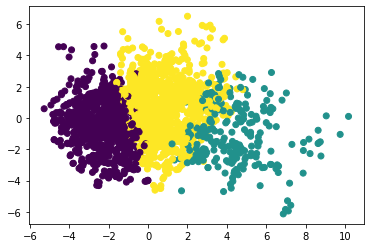

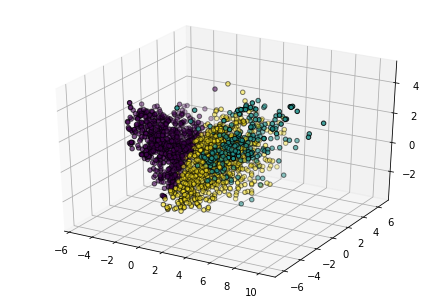

In [315]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)

kmeans=cluster.fit(Z)

score=silhouette_score(X,kmeans.labels_,metric='euclidean')
print('Silhouetter Score: %.3f'%score)

plt.scatter(Z[:, 0], Z[:, 1],c=kmeans.labels_)
fig = plt.figure() 
ax = Axes3D(fig)
ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], c=kmeans.labels_, edgecolor='k')
fig.show()

In [302]:
np.unique(Y, return_counts=True)

(array([1, 2, 3]), array([1655,  295,  176]))

In [303]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)
kmeans=cluster.fit(Z)
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([ 835,  243, 1048]))

In [304]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)     #Εδώ βλέπουμε να μειώνεται σε μεγάλο βαθμό η απόδοση του αλγορίθμου γεγονός που δεχίνει πως η τρίτη συνιστώσα('2') έχει αρκετή πληροφορία για την κλάση NSP
kmeans=cluster.fit(Z)

kmeans.labels_[np.where(kmeans.labels_==2)]=4  #1
kmeans.labels_[np.where(kmeans.labels_==0)]=5  #2  
kmeans.labels_[np.where(kmeans.labels_==1)]=6  #3

kmeans.labels_[np.where(kmeans.labels_==4)]=1
kmeans.labels_[np.where(kmeans.labels_==5)]=2
kmeans.labels_[np.where(kmeans.labels_==6)]=3
labels=kmeans.labels_
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(Y,labels)*100, 1), "%")

print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(Y,labels)*100, 1), "%")

print("--------------- Confusion Matrix ---------------") #65.5% ακρίβεια με 10 συνιστώσες ενώ με 3 64.6% επομένως δεν αξίζει να χαλάσουμε τόση ταχύτητα για 0.8% επιπλέον ακρίβεια
print(confusion_matrix(Y,labels))                           #Τελικό συμπέρασμα οι πρώτες 3 συνιστώσες έχουν την περισσότερη πληροφορία και δίνουν την καλύτερη απόδοση για την πρόβλεψη της κλάσης NSP

Prediction accuracy for the testing dataset is:  64.6 %
Prediction balanced accuracy for the testing dataset is:  69.2 %
--------------- Confusion Matrix ---------------
[[1016  520  119]
 [  31  249   15]
 [   1   66  109]]
